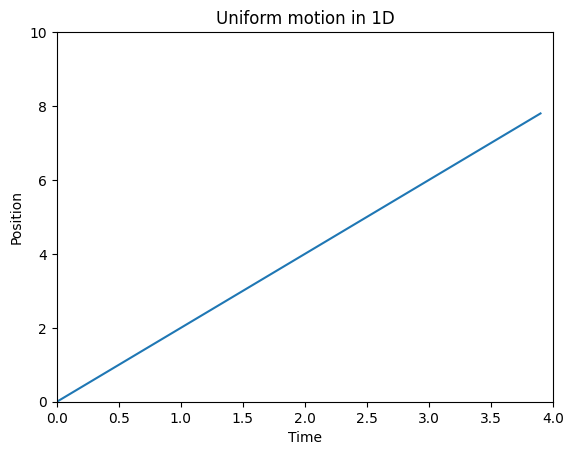

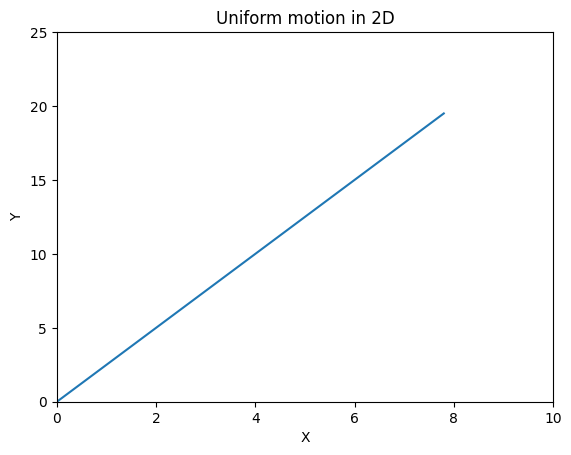

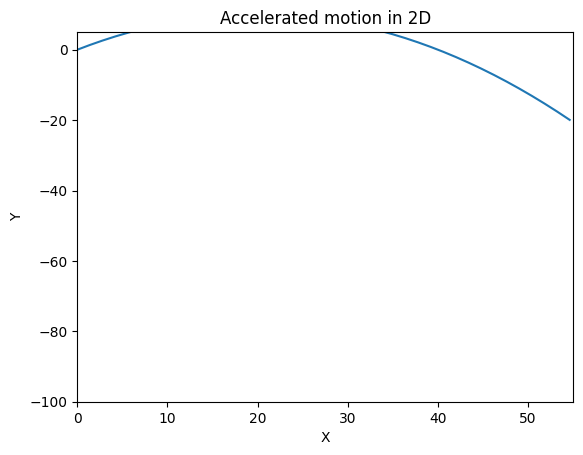

In [8]:
import matplotlib.pyplot as plt

class Um1D:
    def __init__(self, x0, dt, vx0, ttot):                     # class constructor
        self.x0 = x0                                            # initial x position
        self.dt = dt                                            # time increment
        self.vx0 = vx0                                          # x velocity
        self.ttot = ttot                                        # total time
        self.steps = int(ttot / dt)                             # total number steps

    def x(self, t):                                             # x position at time t
        return self.x0 + self.vx0 * t

    def scenario(self, tmin, tmax, title, xlabel, ylabel, xmax, xmin, ymax, ymin):
        times = [tmin + i * self.dt for i in range(self.steps)]
        positions = [self.x(t) for t in times]
        plt.plot(times, positions)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.axis([xmin, xmax, ymin, ymax])
        plt.show()

    def archive(self):                                          # produce file, plot 1D x motion
        with open('um1d_trajectory.txt', 'w') as f:
            for i in range(self.steps):
                t = i * self.dt
                x = self.x(t)
                f.write(f"{t}, {x}\n")

class Um2D(Um1D):
    def __init__(self, x0, dt, vx0, ttot, y0, vy0):            # Um2D subclass of Um1D
        super().__init__(x0, dt, vx0, ttot)                    # to construct Um1D
        self.y0 = y0                                           # initializes y position
        self.vy0 = vy0                                         # initializes y velocity

    def y(self, t):                                            # produces y at time t
        return self.y0 + self.vy0 * t

    def scenario(self, tmin, tmax, title, xlabel, ylabel, xmax, xmin, ymax, ymin):
        times = [tmin + i * self.dt for i in range(self.steps)]
        x_positions = [self.x(t) for t in times]
        y_positions = [self.y(t) for t in times]
        plt.plot(x_positions, y_positions)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.axis([xmin, xmax, ymin, ymax])
        plt.show()

    def archive(self):
        with open('um2d_trajectory.txt', 'w') as f:
            for i in range(self.steps):
                t = i * self.dt
                x = self.x(t)
                y = self.y(t)
                f.write(f"{t}, {x}, {y}\n")

class Accm2D(Um2D):
    def __init__(self, x0, dt, vx0, ttot, y0, vy0, ax0, ay0):   # Daughter of Um2D
        super().__init__(x0, dt, vx0, ttot, y0, vy0)            # Um2D constructor
        self.ax0 = ax0                                         # adds accelerations
        self.ay0 = ay0                                         # to this class

    def ax(self, t):
        return self.ax0

    def ay(self, t):
        return self.ay0

    def x(self, t):
        return self.x0 + self.vx0 * t + 0.5 * self.ax0 * t**2

    def y(self, t):
        return self.y0 + self.vy0 * t + 0.5 * self.ay0 * t**2

    def scenario(self, tmin, tmax, title, xlabel, ylabel, xmax, xmin, ymax, ymin):
        times = [tmin + i * self.dt for i in range(self.steps)]
        x_positions = [self.x(t) for t in times]
        y_positions = [self.y(t) for t in times]
        plt.plot(x_positions, y_positions)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.axis([xmin, xmax, ymin, ymax])
        plt.show()

    def archive(self):
        with open('accm2d_trajectory.txt', 'w') as f:
            for i in range(self.steps):
                t = i * self.dt
                x = self.x(t)
                y = self.y(t)
                f.write(f"{t}, {x}, {y}\n")

# Example usage
unmd = Um1D(0.0, 0.1, 2.0, 4.0)
unmd.scenario(0, 4.0, 'Uniform motion in 1D', 'Time', 'Position', 4.0, 0, 10.0, 0)
unmd.archive()

um2d = Um2D(0.0, 0.1, 2.0, 4.0, 0.0, 5.0)
um2d.scenario(0, 4.0, 'Uniform motion in 2D', 'X', 'Y', 10.0, 0, 25.0, 0)
um2d.archive()

myAcc = Accm2D(0.0, 0.1, 14.0, 4.0, 0.0, 14.0, 0.0, -9.8)
myAcc.scenario(0, 4.0, 'Accelerated motion in 2D', 'X', 'Y', 55, 0, 5, -100.)
myAcc.archive()


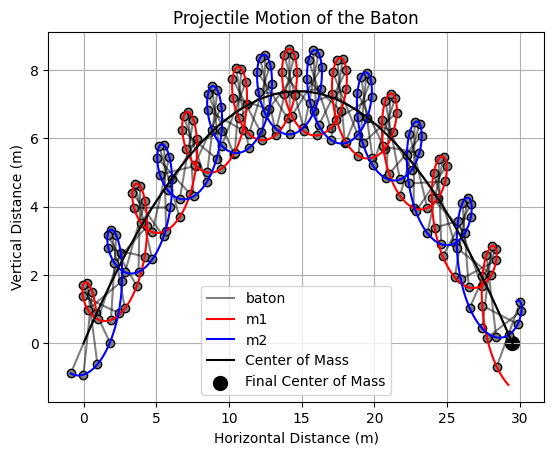

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

class Path:
    def __init__(self, v0, theta):
        self.g = 9.8
        self.v0 = v0
        self.theta = theta
        self.vox = self.v0 * math.cos(self.theta * math.pi / 180.0)
        self.voy = self.v0 * math.sin(self.theta * math.pi / 180.0)

    def getX(self, t):
        return self.vox * t

    def getY(self, t):
        return self.voy * t - 0.5 * self.g * t**2

class Ball:
    def __init__(self, mass, radius):
        self.m = mass
        self.r = radius

    def getM(self):
        return self.m

    def getR(self):
        return self.r

    def getI1(self):
        return (2.0/5.0) * self.m * (self.r)**2

class Baton(Ball, Path):
    def __init__(self, mass, radius, v0, theta, L1, w1):
        Ball.__init__(self, mass, radius)
        Path.__init__(self, v0, theta)
        self.L = L1
        self.w = w1

    def getM1(self):
        return self.m

    def getM(self):
        return 2.0 * self.getM1()

    def getI(self):
        return 2*self.getI1() + 0.5 *  self.getM() * self.L**2

    def getXa(self, t):
        return self.getX(t) + 0.5 * self.L * np.cos(self.w * t + self.theta * math.pi / 180.0)

    def getYa(self, t):
        return self.getY(t) + 0.5 * self.L * np.sin(self.w * t + self.theta * math.pi / 180.0)

    def getXb(self, t):
        return self.getX(t) - 0.5 * self.L * np.cos(self.w * t + self.theta * math.pi / 180.0)

    def getYb(self, t):
        return self.getY(t) - 0.5 * self.L * np.sin(self.w * t + self.theta * math.pi / 180.0)

    def position(self):
        t = np.linspace(0, 2 * self.voy / self.g, 1000)
        xa = self.getXa(t)
        ya = self.getYa(t)
        xb = self.getXb(t)
        yb = self.getYb(t)
        xc = (xa + xb) / 2
        yc = (ya + yb) / 2

        # Connect the masses at specific time intervals
        interval = 10  #  connection frequency
        first_label = True  

        for i in range(0, len(t), interval):
            if first_label:
                plt.plot([xa[i], xb[i]], [ya[i], yb[i]], 'k-', label='baton', alpha=0.5)
                first_label = False 
                plt.plot(xa[i], ya[i], 'ko', markerfacecolor='grey')       # add label for the first time
                plt.plot(xb[i], yb[i], 'ko', markerfacecolor='grey')  


            else:
                plt.plot([xa[i], xb[i]], [ya[i], yb[i]], 'k-', alpha=0.5)  # without adding label in the next iterations
                plt.plot(xa[i], ya[i], 'ko', markerfacecolor='grey') 
                plt.plot(xb[i], yb[i], 'ko', markerfacecolor='grey')  

        plt.plot(xa, ya, 'r-', label='m1')  
        plt.plot(xb, yb, 'b-', label='m2')  

        plt.plot(xc, yc, 'k-', label='Center of Mass')  
        plt.scatter(xc[-1], yc[-1], color='k', marker='o', s=100, label='Final Center of Mass')
        
        plt.xlabel('Horizontal Distance (m)')
        plt.ylabel('Vertical Distance (m)')

        plt.title('Projectile Motion of the Baton')
        plt.legend()
        plt.grid(True)
        plt.show()

       

mybaton = Baton(mass=0.5, radius=0.4, v0=17.0, theta=45.0, L1=2.5, w1=22.0)
mybaton.position()



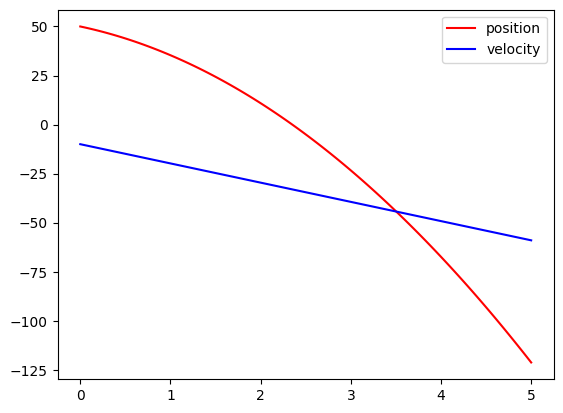

In [9]:
# free fall

import numpy as np
import matplotlib.pyplot as plt 

def derivs(state,time):      
    g0 = state[1]
    g1 = -9.8
    g = np.array([g0,g1])      
    return g

def euler(y,t,dt,derivs):
    y_next = y + derivs(y,t)*dt
    return y_next 

N = 100
y = np.zeros([N,2])

y[0,0] = 50  #initial position of object
y[0,1] = -10 #initial velocity of the object
tau = 5      #computation time

dt = tau/float(N-1)  #time step 
time = np.linspace(0,tau,N)

plt.figure()
for j in range(N-1):
    y[j+1, :]  = euler(y[j,:],time[j],dt,derivs)

xdata = [ y[j,0] for j in range(N) ] 
vdata = [ y[j,1] for j in range(N) ] 

plt.plot(time,xdata,'r')
plt.plot(time,vdata,'b')
plt.legend(['position', 'velocity'])

plt.show()



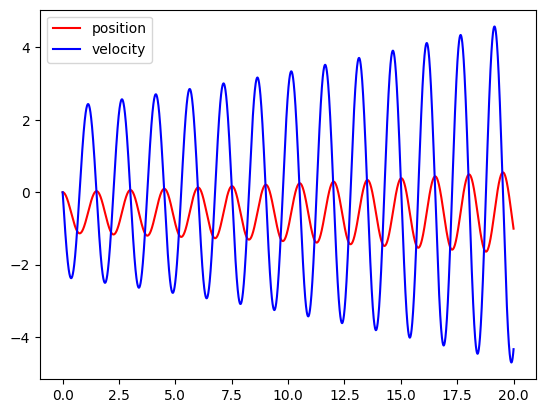

In [10]:
# spring mass

import numpy as np
import matplotlib.pyplot as plt 

def derivspring(state,time):    
    k= -3.5
    m= 0.2
    g= 9.8  
    g0 = state[1]
    g1 = k/m * state[0] - g
    g = np.array([g0,g1])      
    return g

def euler(y,t,dt,derivspring):
    y_next = y + derivspring(y,t)*dt
    return y_next 

N = 5000
y = np.zeros([N,2])

y[0,0] = 0  #initial position of object
y[0,1] = -0 #initial velocity of the object
tau = 20    #computation time

dt = tau/float(N-1)  #time step 
time = np.linspace(0,tau,N)

plt.figure()
for j in range(N-1):
    y[j+1, :]  = euler(y[j,:],time[j],dt,derivspring)

xdata = [ y[j,0] for j in range(N) ] 
vdata = [ y[j,1] for j in range(N) ] 

plt.plot(time,xdata,'r')
plt.plot(time,vdata,'b')
plt.legend(['position', 'velocity'])

plt.show()



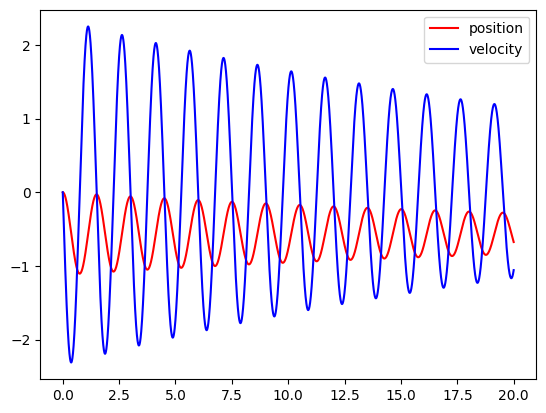

In [16]:
# spring mass  ,  euler cromer

import numpy as np
import matplotlib.pyplot as plt 

def derivspring(state,time):    
    k= -3.5
    m= 0.2
    g= 9.8  
    g0 = state[1]
    g1 = k/m * state[0] - g
    g = np.array([g0,g1])      
    return g

def euler(y,t,dt,derivspring):
    y_next = y + derivspring(y,t)*dt
    return y_next 


N = 5000
y = np.zeros([N,2])

y[0,0] = 0  #initial position of object
y[0,1] = -0 #initial velocity of the object
tau = 20    #computation time

dt = tau/float(N-1)  #time step 
time = np.linspace(0,tau,N)

plt.figure()

for j in range(N-1):
    y[j+1, :]  = euler(y[j,:],time[j],dt,derivspring)
    d = derivspring(y[j + 1, :], time[j + 1])
    y[j+1,:] = y[j,:] + d[:] * dt
    

xdata = [ y[j,0] for j in range(N) ] 
vdata = [ y[j,1] for j in range(N) ] 

plt.plot(time,xdata,'r')
plt.plot(time,vdata,'b')
plt.legend(['position', 'velocity'])

plt.show()



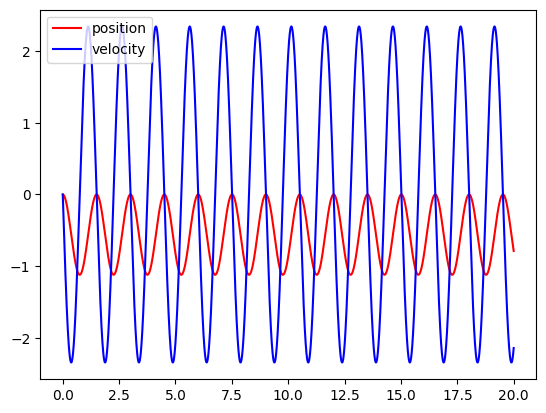

In [17]:
#rk2

import numpy as np
import matplotlib.pyplot as plt 

def derivspring(state,time):    
    k= -3.5
    m= 0.2
    g= 9.8  
    g0 = state[1]
    g1 = k/m * state[0] - g
    g = np.array([g0,g1])      
    return g

def euler(y,t,dt,derivspring):
    y_next = y + derivspring(y,t)*dt
    return y_next 

def rk2(y,t,dt, derivs):
    k0 = dt*derivs(y,t)
    k1 = dt*derivs (y+k0,t+dt)              
    y_next = y + 0.5*(k0+k1) 
    return y_next


def rk4(y,t,dt, derivs):
    k1=dt*derivs(y,t)
    k2=dt*derivs (y+(k1/2),t+(dt/2))
    k3=dt*derivs (y+(k2/2),t+(dt/2))
    k4=dt*derivs (y+k3,t+dt)
    y_next=y + (k1+2*k2+2*k3+k4)/6 
    return y_next

N = 5000
y = np.zeros([N,2])

y[0,0] = 0  #initial position of object
y[0,1] = -0 #initial velocity of the object
tau = 20    #computation time

dt = tau/float(N-1)  #time step 
time = np.linspace(0,tau,N)

plt.figure()

for j in range(N-1):
    y[j+1, :]  = rk2(y[j,:],time[j],dt,derivspring)
    
    

xdata = [ y[j,0] for j in range(N) ] 
vdata = [ y[j,1] for j in range(N) ] 

plt.plot(time,xdata,'r')
plt.plot(time,vdata,'b')
plt.legend(['position', 'velocity'])

plt.show()



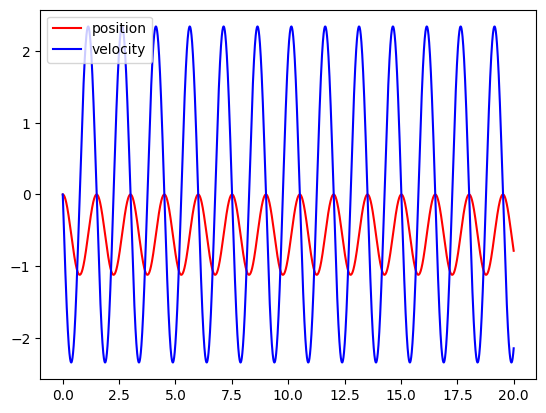

In [20]:
#rk4

import numpy as np
import matplotlib.pyplot as plt 

def derivspring(state,time):    
    k= -3.5
    m= 0.2
    g= 9.8  
    g0 = state[1]
    g1 = k/m * state[0] - g
    g = np.array([g0,g1])      
    return g

def euler(y,t,dt,derivspring):
    y_next = y + derivspring(y,t)*dt
    return y_next 

def rk2(y,t,dt, derivs):
    k0 = dt*derivs(y,t)
    k1 = dt*derivs (y+k0,t+dt)              
    y_next = y + 0.5*(k0+k1) 
    return y_next


def rk4(y,t,dt, derivs):
    k1=dt*derivs(y,t)
    k2=dt*derivs (y+(k1/2),t+(dt/2))
    k3=dt*derivs (y+(k2/2),t+(dt/2))
    k4=dt*derivs (y+k3,t+dt)
    y_next=y + (k1+2*k2+2*k3+k4)/6 
    return y_next


N = 5000
y = np.zeros([N,2])

y[0,0] = 0  #initial position of object
y[0,1] = -0 #initial velocity of the object
tau = 20    #computation time

dt = tau/float(N-1)  #time step 
time = np.linspace(0,tau,N)

plt.figure()

for j in range(N-1):
    y[j+1, :]  = rk4(y[j,:],time[j],dt,derivspring)
    
    

xdata = [ y[j,0] for j in range(N) ] 
vdata = [ y[j,1] for j in range(N) ] 

plt.plot(time,xdata,'r')
plt.plot(time,vdata,'b')
plt.legend(['position', 'velocity'])

plt.show()



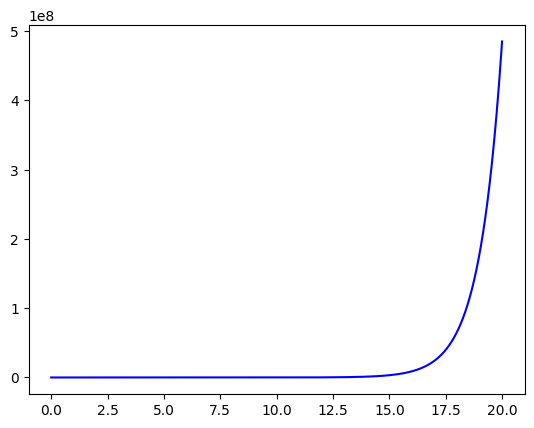

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def derive(y,t):
    f= np.exp(t)
    return f

def euler (y,t,dt,derive):
    y_next = y + dt * derive(y,t)
    return y_next 

N = 1000
y = np.zeros([N])
t = np.zeros([N])

y[0]= 1
tau = 20
t = np.linspace(0,tau,N)
dt = tau/float(N)

for j in range(N-1):
    y[j+1] = euler(y[j], t[j],dt,derive)


plt.plot(t,np.exp(t)+y[0]-1,'b')  
 



C:\Users\shiva\AppData\Local\Temp\ipykernel_20576\2525705520.py:5: RuntimeWarning: overflow encountered in scalar power
  f= t* y**2


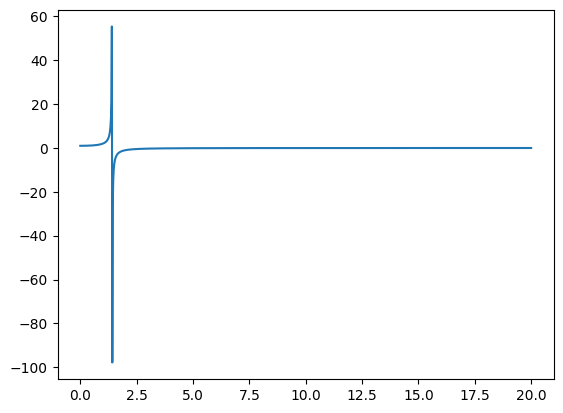

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def derive(y,t):
    f= t* y**2
    return f

def euler (y,t,dt,derive):
    y_next = y + dt * derive(y,t)
    return y_next 

N = 1000
y = np.zeros([N])
t = np.zeros([N])

y[0]= 1
tau = 20
t = np.linspace(0,tau,N)
dt = tau/float(N)

for j in range(N-1):
    y[j+1] = euler(y[j], t[j],dt,derive)

ysol = -1/((t**2)/2 - 1/ y[0])
plt.plot(t,ysol)  
 



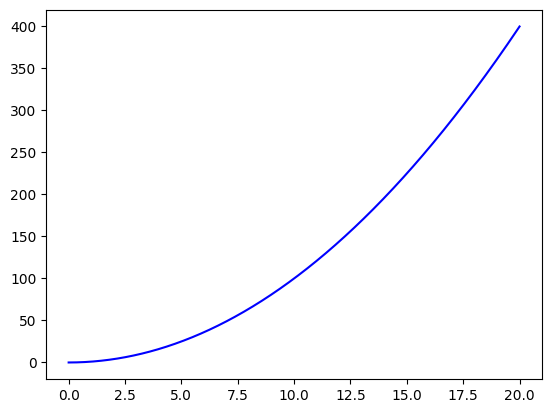

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def derive(y,t):
    f= 2*t
    return f

def euler (y,t,dt,derive):
    y_next = y + dt * derive(y,t)
    return y_next 

N = 1000
y = np.zeros([N])
t = np.zeros([N])

tau = 20
t = np.linspace(0,tau,N)
dt = tau/float(N)

y[0]= 0

for j in range(N-1):
    y[j+1] = euler(y[j], t[j],dt,derive)

ysol = t**2
plt.plot(t,ysol,'b')  
 



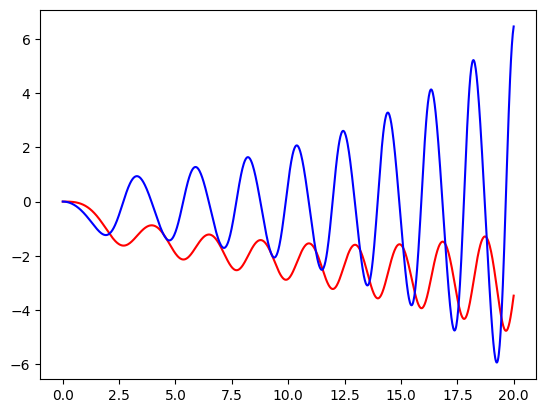

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def derive(y, t):
    y0 = y[1]
    y1 = 2 * y[0]**2 - t
    dydt = np.array([y0, y1])
    return dydt

def euler(y, t, dt, derive):
    y_next = y + dt * derive(y, t)
    return y_next 

N = 1000
y = np.zeros([N, 2])
t = np.zeros([N])

tau = 20
t = np.linspace(0, tau, N)
dt = tau / float(N)

y[0, 0] = 0
y[0, 1] = 0

for j in range(N - 1):
    y[j + 1, :] = euler(y[j, :], t[j], dt, derive)

time = np.linspace(0, tau, N) # Added this line to define time
xdata = [y[j, 0] for j in range(N)] 
vdata = [y[j, 1] for j in range(N)] 

plt.plot(time, xdata, 'r')
plt.plot(time, vdata, 'b')
plt.show()


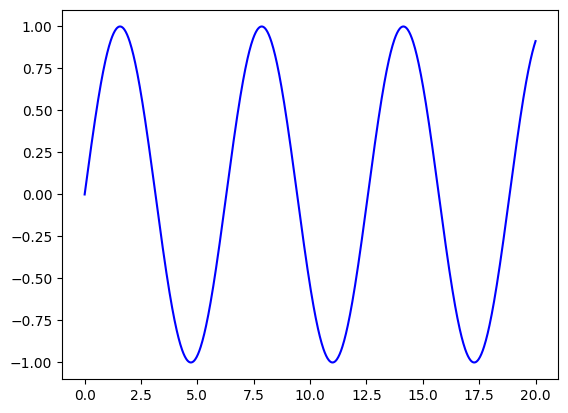

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def derive(y,t):
    f= np.cos(t)
    return f

def euler (y,t,dt,derive):
    y_next = y + dt * derive(y,t)
    return y_next 

y = np.zeros([N])

N = 1000
tau = 20
t = np.linspace(0,tau,N)
dt = tau/float(N)

y[0]= 0

for j in range(N-1):
    y[j+1] = euler(y[j], t[j],dt,derive)

ysol = np.sin(t)
plt.plot(t,ysol,'b')  
 



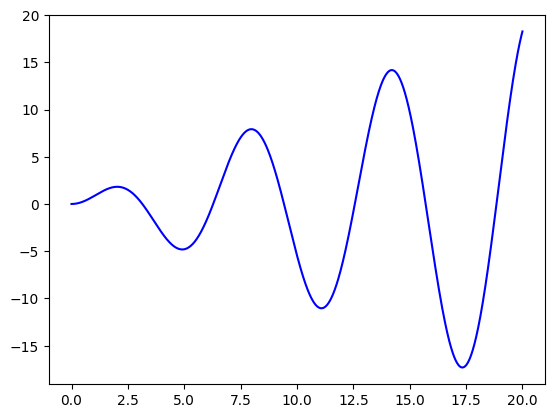

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def derive(y,t):
    f= np.sin(t) + t*np.cos(t) 
    return f

def euler (y,t,dt,derive):
    y_next = y + dt * derive(y,t)
    return y_next 

y = np.zeros([N])

N = 1000
tau = 20
t = np.linspace(0,tau,N)
dt = tau/float(N)

y[0]= 0

for j in range(N-1):
    y[j+1] = euler(y[j], t[j],dt,derive)

ysol = t* np.sin(t)
plt.plot(t,ysol,'b')  
 



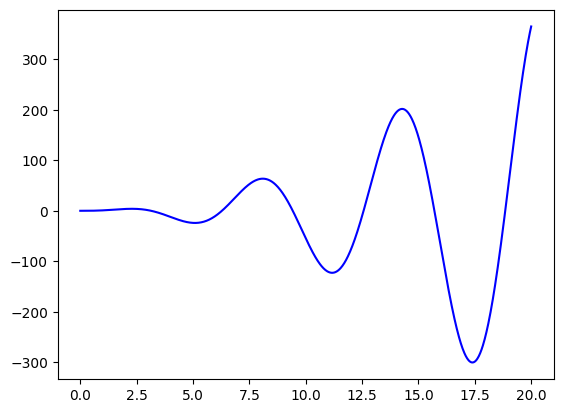

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def derive(y,t):
    f= 2*t* np.sin(t) + t**2 *np.cos(t) 
    return f

def euler (y,t,dt,derive):
    y_next = y + dt * derive(y,t)
    return y_next 

y = np.zeros([N])

N = 1000
tau = 20
t = np.linspace(0,tau,N)
dt = tau/float(N)

y[0]= 0

for j in range(N-1):
    y[j+1] = euler(y[j], t[j],dt,derive)

ysol = t**2 * np.sin(t)
plt.plot(t,ysol,'b')  
 



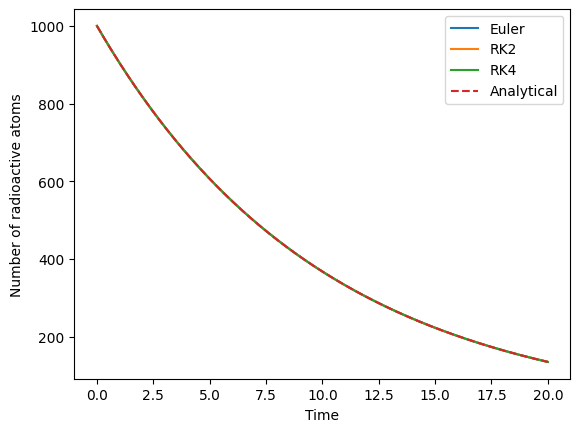

In [35]:
import numpy as np
import matplotlib.pyplot as plt 

# Function for radioactive decay
def decay(N, t):
    decay_constant = 0.1  # Example decay constant
    return -decay_constant * N

# Euler method for numerical integration
def euler(N, t, dt):
    N_next = N + decay(N, t) * dt
    return N_next

# RK2 method for numerical integration
def rk2(N, t, dt):
    k1 = dt * decay(N, t)
    k2 = dt * decay(N + 0.5 * k1, t + 0.5 * dt)
    N_next = N + k2
    return N_next

# RK4 method for numerical integration
def rk4(N, t, dt):
    k1 = dt * decay(N, t)
    k2 = dt * decay(N + 0.5 * k1, t + 0.5 * dt)
    k3 = dt * decay(N + 0.5 * k2, t + 0.5 * dt)
    k4 = dt * decay(N + k3, t + dt)
    N_next = N + (k1 + 2*k2 + 2*k3 + k4) / 6
    return N_next

# Initial conditions
N0 = 1000  # Initial number of radioactive atoms
tau = 20   # Computation time
N_steps = 5000
dt = tau / N_steps
time = np.linspace(0, tau, N_steps)

# Arrays to store results
N_euler = np.zeros(N_steps)
N_rk2 = np.zeros(N_steps)
N_rk4 = np.zeros(N_steps)

# Initial values
N_euler[0] = N0
N_rk2[0] = N0
N_rk4[0] = N0

# Numerical integration using different methods
for i in range(1, N_steps):
    N_euler[i] = euler(N_euler[i-1], time[i-1], dt)
    N_rk2[i] = rk2(N_rk2[i-1], time[i-1], dt)
    N_rk4[i] = rk4(N_rk4[i-1], time[i-1], dt)

# Analytical solution
N_analytical = N0 * np.exp(-0.1 * time)

# Plotting results
plt.plot(time, N_euler, label='Euler')
plt.plot(time, N_rk2, label='RK2')
plt.plot(time, N_rk4, label='RK4')
plt.plot(time, N_analytical, label='Analytical', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Number of radioactive atoms')
plt.legend()
plt.show()


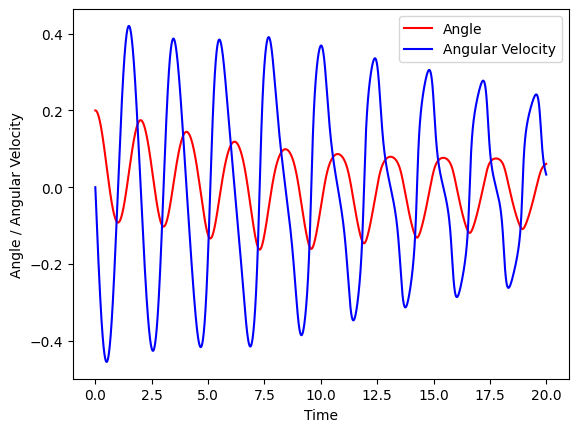

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def deriv_pend(y, t, g, l, b, beta):
    y0 = y[1]
    y1 = -(g / l) * np.sin(y[0]) - b * y[1] + beta * np.cos(y[1] * t)
    dydt = np.array([y0, y1])
    return dydt

def rk4(y, t, dt, g, l, b, beta):
    k1 = dt * deriv_pend(y, t, g, l, b, beta)
    k2 = dt * deriv_pend(y + 0.5 * k1, t + 0.5 * dt, g, l, b, beta)
    k3 = dt * deriv_pend(y + 0.5 * k2, t + 0.5 * dt, g, l, b, beta)
    k4 = dt * deriv_pend(y + k3, t + dt, g, l, b, beta)
    y_next = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return y_next

N = 5000
y = np.zeros([N, 2])

# Initial conditions
y[0, 0] = 0.2  # Initial angle
y[0, 1] = 0.0  # Initial angular velocity

# Parameters
g = 9.8       # Acceleration due to gravity
l = 1.0       # Length of pendulum
b = 0.1       # Damping coefficient
beta = 0.5    # Amplitude of driving force

tau = 20      # Computation time
dt = tau / (N - 1)  # Time step
time = np.linspace(0, tau, N)

plt.figure()

for j in range(N - 1):
    y[j + 1, :] = rk4(y[j, :], time[j], dt, g, l, b, beta)

plt.plot(time, y[:, 0], 'r', label='Angle')
plt.plot(time, y[:, 1], 'b', label='Angular Velocity')
plt.xlabel('Time')
plt.ylabel('Angle / Angular Velocity')
plt.legend()
plt.show()


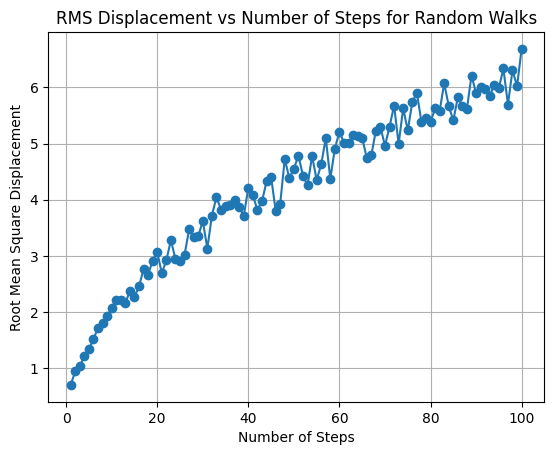

In [37]:
import random
import numpy as np
import matplotlib.pyplot as plt

def random_walk(steps):
    position = 0
    positions = [position]
    for _ in range(steps):
        step = random.choice([-1, 1])
        position += step
        positions.append(position)
    return positions

def rms_displacement(walk):
    squared_displacements = [(x - walk[0])**2 for x in walk]
    return np.sqrt(np.mean(squared_displacements))

num_walks = 100
max_steps = 100
rms_values = []

for steps in range(1, max_steps + 1):
    rms_sum = 0
    for _ in range(num_walks):
        walk = random_walk(steps)
        rms_sum += rms_displacement(walk)
    rms_avg = rms_sum / num_walks
    rms_values.append(rms_avg)

plt.plot(range(1, max_steps + 1), rms_values, marker='o', linestyle='-')
plt.xlabel('Number of Steps')
plt.ylabel('Root Mean Square Displacement')
plt.title('RMS Displacement vs Number of Steps for Random Walks')
plt.grid(True)
plt.show()


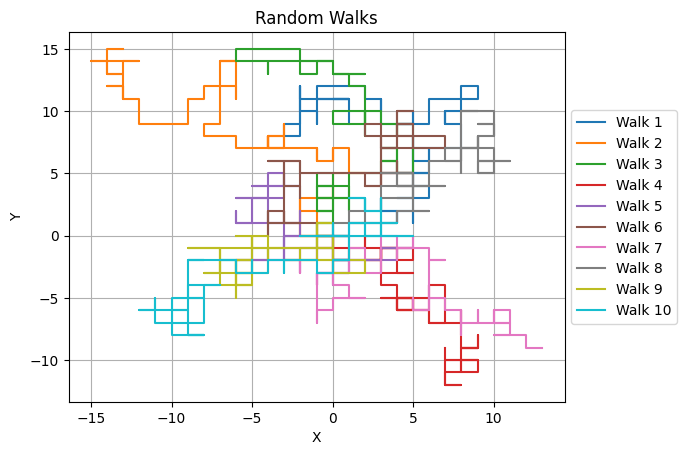

In [40]:
import random
import matplotlib.pyplot as plt

def random_walk(steps):
    position = [0, 0]
    positions = [position.copy()]
    for _ in range(steps):
        step = random.choice([(1, 0), (-1, 0), (0, 1), (0, -1)])  # Random step in all four directions
        position[0] += step[0]
        position[1] += step[1]
        positions.append(position.copy())
    return positions

def generate_random_walks(num_walks, num_steps):
    walks = []
    for _ in range(num_walks):
        walk = random_walk(num_steps)
        walks.append(walk)
    return walks

def plot_random_walks(walks):
    for i, walk in enumerate(walks):
        plt.plot([pos[0] for pos in walk], [pos[1] for pos in walk], label=f'Walk {i+1}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Random Walks')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    plt.show()

def main():
    num_walks = int(input("Enter the number of walks: "))
    num_steps = int(input("Enter the number of steps for each walk: "))
    
    walks = generate_random_walks(num_walks, num_steps)
    plot_random_walks(walks)

if __name__ == "__main__":
    main()


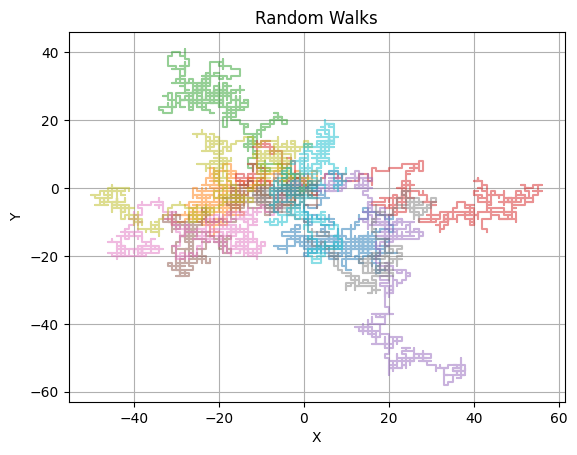

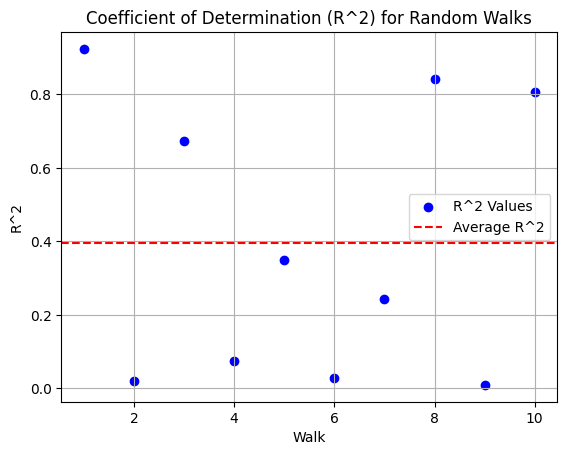

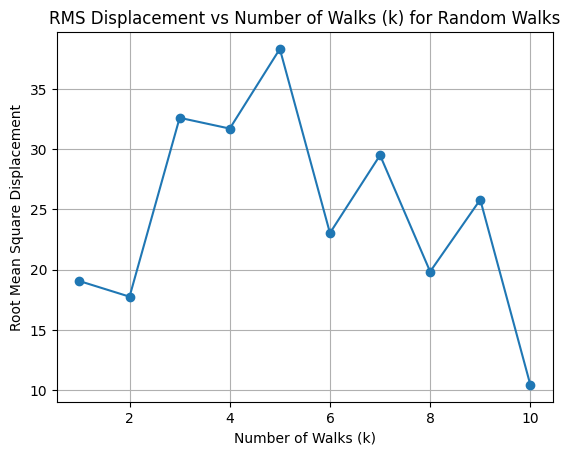

In [43]:
import random
import numpy as np
import matplotlib.pyplot as plt

def random_walk(steps):
    position = [0, 0]
    positions = [position.copy()]
    radial_distances_sq = [0]
    for _ in range(steps):
        step = random.choice([(1, 0), (-1, 0), (0, 1), (0, -1)])  # Random step in all four directions
        position[0] += step[0]
        position[1] += step[1]
        positions.append(position.copy())
        radial_distances_sq.append(position[0]**2 + position[1]**2)
    x = np.array([pos[0] for pos in positions])
    r_squared_values = np.corrcoef(x, radial_distances_sq)[0, 1]**2
    return positions, r_squared_values

def rms_displacement(walk):
    squared_displacements = [(pos[0]**2 + pos[1]**2) for pos in walk]
    return np.sqrt(np.mean(squared_displacements))

def generate_random_walks(num_walks, num_steps):
    walks = []
    for _ in range(num_walks):
        walk, _ = random_walk(num_steps)
        walks.append(walk)
    return walks

def plot_random_walks(walks):
    for walk in walks:
        x = [pos[0] for pos in walk]
        y = [pos[1] for pos in walk]
        plt.plot(x, y, alpha=0.5)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Random Walks')
    plt.grid(True)
    plt.show()

def plot_r_squared_values(r_squared_values):
    plt.scatter(range(1, len(r_squared_values) + 1), r_squared_values, color='blue', label='R^2 Values')
    avg_r_squared = np.mean(r_squared_values)
    plt.axhline(y=avg_r_squared, color='red', linestyle='--', label='Average R^2')
    plt.xlabel('Walk')
    plt.ylabel('R^2')
    plt.title('Coefficient of Determination (R^2) for Random Walks')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_rms_vs_k(rms_values):
    plt.plot(range(1, len(rms_values) + 1), rms_values, marker='o', linestyle='-')
    plt.xlabel('Number of Walks (k)')
    plt.ylabel('Root Mean Square Displacement')
    plt.title('RMS Displacement vs Number of Walks (k) for Random Walks')
    plt.grid(True)
    plt.show()

def main():
    num_walks = int(input("Enter the number of walks: "))
    num_steps = int(input("Enter the number of steps for each walk: "))
    
    walks = generate_random_walks(num_walks, num_steps)
    plot_random_walks(walks)
    
    r_squared_values = []
    rms_values = []
    for walk in walks:
        _, r_squared = random_walk(num_steps)
        r_squared_values.append(r_squared)
        rms_values.append(rms_displacement(walk))
    
    plot_r_squared_values(r_squared_values)
    plot_rms_vs_k(rms_values)

if __name__ == "__main__":
    main()




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_decay(num_atoms, decay_prob, num_steps):
    remaining_atoms = np.ones(num_atoms, dtype=int)
    decayed_counts = []

    for _ in range(num_steps):
        decayed = np.random.rand(num_atoms) < decay_prob
        remaining_atoms -= decayed
        decayed_counts.append(num_atoms - np.sum(remaining_atoms))

    return decayed_counts

def plot_decay(decayed_counts):
    plt.plot(range(len(decayed_counts)), decayed_counts)
    plt.xlabel('Time Step')
    plt.ylabel('Decayed Atoms')
    plt.title('Radioactive Decay Simulation')
    plt.grid(True)
    plt.show()

def main():
    num_atoms = int(input("Enter the number of radioactive atoms: "))
    decay_prob = float(input("Enter the decay probability per time step (between 0 and 1): "))
    num_steps = int(input("Enter the number of time steps: "))

    decayed_counts = simulate_decay(num_atoms, decay_prob, num_steps)
    plot_decay(decayed_counts)

if __name__ == "__main__":
    main()



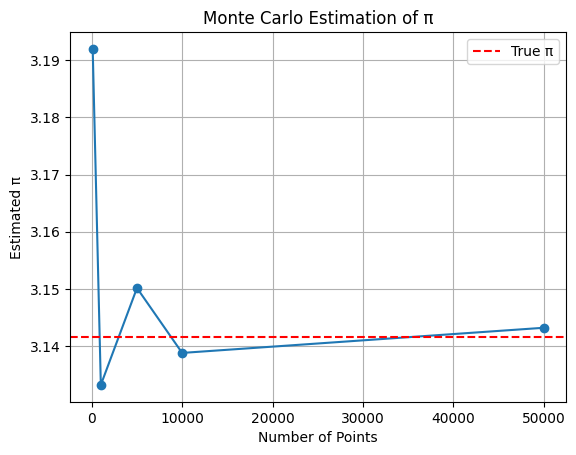

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_pi(num_points):
    points = np.random.rand(num_points, 2)  # Generate random points in the unit square
    inside_circle = points[:, 0]**2 + points[:, 1]**2 <= 1  # Check if points are inside the unit circle
    inside_circle_count = np.sum(inside_circle)
    estimated_pi = 4 * inside_circle_count / num_points
    return estimated_pi

def plot_estimate_vs_points(num_points_range, num_simulations):
    estimates = []
    for num_points in num_points_range:
        pi_estimate = np.mean([monte_carlo_pi(num_points) for _ in range(num_simulations)])
        estimates.append(pi_estimate)
    
    plt.plot(num_points_range, estimates, marker='o')
    plt.axhline(y=np.pi, color='red', linestyle='--', label='True π')
    plt.xlabel('Number of Points')
    plt.ylabel('Estimated π')
    plt.title('Monte Carlo Estimation of π')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    num_points_range = [100, 1000, 5000, 10000, 50000]
    num_simulations = 10

    plot_estimate_vs_points(num_points_range, num_simulations)

if __name__ == "__main__":
    main()


In [10]:
def lcg(seed, a, c, m):
    random_values = []
    x = seed
    

    for _ in range(random.randrange(0,100)):
        x = (a * x + c) % m
        if(random_values.count(x)== 0 ):
            random_values.append(x)
        else:
            break
    return random_values

def main():
    
    a = 6
    c = 2
    m = 11
    
    for _ in range(random.randrange(0,100)):
        seed = random.randrange(0,100)
        random_sequence = lcg(seed, a, c, m )
        print("Random sequence:", random_sequence)
        print("Length of sequence:", len(random_sequence))

if __name__ == "__main__":
    main()


Random sequence: [0, 2, 3, 9, 1, 8, 6, 5, 10, 7]
Length of sequence: 10
Random sequence: [3, 9, 1, 8, 6, 5, 10, 7, 0, 2]
Length of sequence: 10
Random sequence: [3, 9, 1, 8, 6, 5, 10, 7, 0, 2]
Length of sequence: 10
Random sequence: [0, 2, 3, 9, 1, 8, 6, 5, 10, 7]
Length of sequence: 10
Random sequence: [2, 3, 9, 1, 8, 6, 5, 10, 7, 0]
Length of sequence: 10
Random sequence: [10, 7, 0, 2, 3, 9, 1, 8, 6, 5]
Length of sequence: 10
Random sequence: [4]
Length of sequence: 1
Random sequence: [4]
Length of sequence: 1
Random sequence: [2, 3, 9, 1, 8, 6, 5, 10, 7, 0]
Length of sequence: 10
Random sequence: [8, 6, 5, 10, 7, 0, 2, 3, 9, 1]
Length of sequence: 10
Random sequence: [8, 6, 5, 10, 7, 0, 2, 3, 9, 1]
Length of sequence: 10
Random sequence: [8, 6, 5, 10, 7, 0, 2, 3, 9, 1]
Length of sequence: 10
Random sequence: [1, 8, 6, 5, 10, 7, 0, 2, 3, 9]
Length of sequence: 10
Random sequence: [2, 3, 9, 1, 8, 6, 5, 10, 7, 0]
Length of sequence: 10
Random sequence: [5, 10, 7, 0, 2, 3, 9, 1, 8, 6]
L

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

class Path:
    def __init__(self, v0, theta):
        self.g = 9.8
        self.v0 = v0
        self.theta = theta
        self.vox = self.v0 * math.cos(self.theta * math.pi / 180.0)
        self.voy = self.v0 * math.sin(self.theta * math.pi / 180.0)

    def getX(self, t):
        return self.vox * t

    def getY(self, t):
        return self.voy * t - 0.5 * self.g * t**2

class Ball:
    def __init__(self, mass, radius):
        self.m = mass
        self.r = radius

    def getM(self):
        return self.m

    def getR(self):
        return self.r

    def getI1(self):
        return (2.0/5.0) * self.m * (self.r)**2

class Baton(Ball, Path):
    def __init__(self, mass, radius, v0, theta, L1, w1):
        Ball.__init__(self, mass, radius)
        Path.__init__(self, v0, theta)
        self.L = L1
        self.w = w1

    def getM1(self):
        return self.m

    def getM(self):
        return 2.0 * self.getM1()

    def getI(self):
        return self.getI1() + 0.5 * self.L**2 * self.getM() * self.L**2

    def getXa(self, t):
        return self.getX(t) + 0.5 * self.L * np.cos(self.w * t + self.theta * math.pi / 180.0)

    def getYa(self, t):
        return self.getY(t) + 0.5 * self.L * np.sin(self.w * t + self.theta * math.pi / 180.0)

    def getXb(self, t):
        return self.getX(t) - 0.5 * self.L * np.cos(self.w * t + self.theta * math.pi / 180.0)

    def getYb(self, t):
        return self.getY(t) - 0.5 * self.L * np.sin(self.w * t + self.theta * math.pi / 180.0)

    def position(self):
        t = np.linspace(0, 2 * self.voy / self.g, 1000)
        xa = self.getXa(t)
        ya = self.getYa(t)
        xb = self.getXb(t)
        yb = self.getYb(t)
        xc = (xa + xb) / 2
        yc = (ya + yb) / 2

        # Connect the masses at specific time intervals
        interval = 10  #  connection frequency
        first_label = True  

        for i in range(0, len(t), interval):
            if first_label:
                plt.plot([xa[i], xb[i]], [ya[i], yb[i]], 'k-', label='baton', alpha=0.5)
                first_label = False 
                plt.plot(xa[i], ya[i], 'ko', markerfacecolor='grey')       # add label for the first time
                plt.plot(xb[i], yb[i], 'ko', markerfacecolor='grey')  


            else:
                plt.plot([xa[i], xb[i]], [ya[i], yb[i]], 'k-', alpha=0.5)  # without adding label in the next iterations
                plt.plot(xa[i], ya[i], 'ko', markerfacecolor='grey') 
                plt.plot(xb[i], yb[i], 'ko', markerfacecolor='grey')  

        plt.plot(xa, ya, 'r-', label='m1')  
        plt.plot(xb, yb, 'b-', label='m2')  

        plt.plot(xc, yc, 'k-', label='Center of Mass')  
        plt.scatter(xc[-1], yc[-1], color='k', marker='o', s=100, label='Final Center of Mass')
        
        plt.xlabel('Horizontal Distance (m)')
        plt.ylabel('Vertical Distance (m)')

        plt.title('Projectile Motion of the Baton')
        plt.legend()
        plt.grid(True)
        plt.show()

       

mybaton = Baton(mass=0.5, radius=0.4, v0=17.0, theta=45.0, L1=2.5, w1=22.0)
mybaton.position()



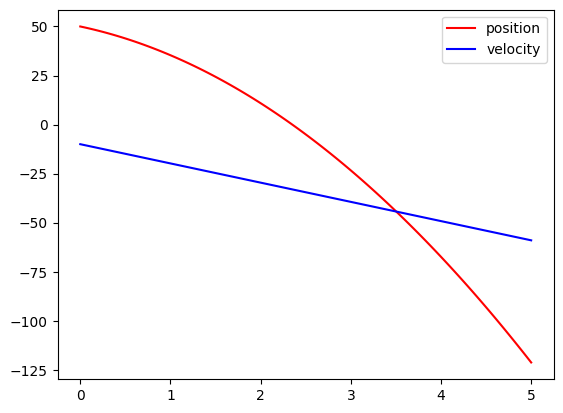

In [ ]:
# free fall

import numpy as np
import matplotlib.pyplot as plt 

def derivs(state,time):      
    g0 = state[1]
    g1 = -9.8
    g = np.array([g0,g1])      
    return g

def euler(y,t,dt,derivs):
    y_next = y + derivs(y,t)*dt
    return y_next 

N = 100
y = np.zeros([N,2])

y[0,0] = 50  #initial position of object
y[0,1] = -10 #initial velocity of the object
tau = 5      #computation time

dt = tau/float(N-1)  #time step 
time = np.linspace(0,tau,N)

plt.figure()
for j in range(N-1):
    y[j+1, :]  = euler(y[j,:],time[j],dt,derivs)

xdata = [ y[j,0] for j in range(N) ] 
vdata = [ y[j,1] for j in range(N) ] 

plt.plot(time,xdata,'r')
plt.plot(time,vdata,'b')
plt.legend(['position', 'velocity'])

plt.show()



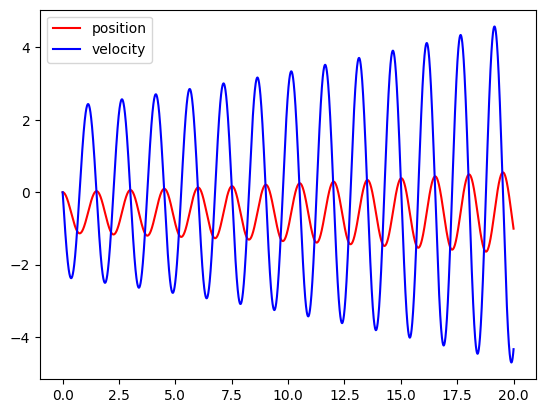

In [ ]:
# spring mass

import numpy as np
import matplotlib.pyplot as plt 

def derivspring(state,time):    
    k= -3.5
    m= 0.2
    g= 9.8  
    g0 = state[1]
    g1 = k/m * state[0] - g
    g = np.array([g0,g1])      
    return g

def euler(y,t,dt,derivspring):
    y_next = y + derivspring(y,t)*dt
    return y_next 

N = 5000
y = np.zeros([N,2])

y[0,0] = 0  #initial position of object
y[0,1] = -0 #initial velocity of the object
tau = 20    #computation time

dt = tau/float(N-1)  #time step 
time = np.linspace(0,tau,N)

plt.figure()
for j in range(N-1):
    y[j+1, :]  = euler(y[j,:],time[j],dt,derivspring)

xdata = [ y[j,0] for j in range(N) ] 
vdata = [ y[j,1] for j in range(N) ] 

plt.plot(time,xdata,'r')
plt.plot(time,vdata,'b')
plt.legend(['position', 'velocity'])

plt.show()



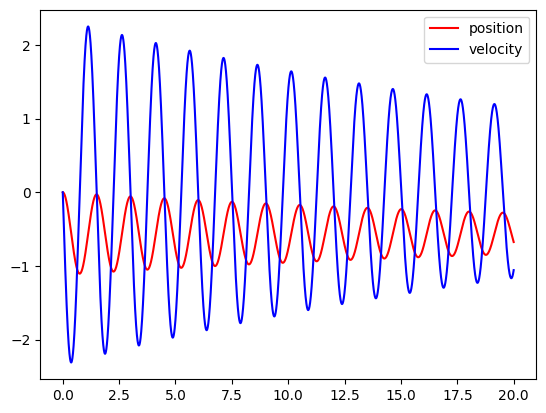

In [ ]:
# spring mass  ,  euler cromer

import numpy as np
import matplotlib.pyplot as plt 

def derivspring(state,time):    
    k= -3.5
    m= 0.2
    g= 9.8  
    g0 = state[1]
    g1 = k/m * state[0] - g
    g = np.array([g0,g1])      
    return g

def euler(y,t,dt,derivspring):
    y_next = y + derivspring(y,t)*dt
    return y_next 


N = 5000
y = np.zeros([N,2])

y[0,0] = 0  #initial position of object
y[0,1] = -0 #initial velocity of the object
tau = 20    #computation time

dt = tau/float(N-1)  #time step 
time = np.linspace(0,tau,N)

plt.figure()

for j in range(N-1):
    y[j+1, :]  = euler(y[j,:],time[j],dt,derivspring)
    d = derivspring(y[j + 1, :], time[j + 1])
    y[j+1,:] = y[j,:] + d[:] * dt
    

xdata = [ y[j,0] for j in range(N) ] 
vdata = [ y[j,1] for j in range(N) ] 

plt.plot(time,xdata,'r')
plt.plot(time,vdata,'b')
plt.legend(['position', 'velocity'])

plt.show()



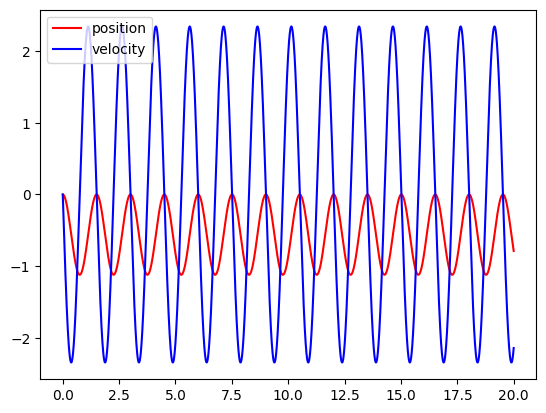

In [ ]:
#rk2

import numpy as np
import matplotlib.pyplot as plt 

def derivspring(state,time):    
    k= -3.5
    m= 0.2
    g= 9.8  
    g0 = state[1]
    g1 = k/m * state[0] - g
    g = np.array([g0,g1])      
    return g

def euler(y,t,dt,derivspring):
    y_next = y + derivspring(y,t)*dt
    return y_next 

def rk2(y,t,dt, derivs):
    k0 = dt*derivs(y,t)
    k1 = dt*derivs (y+k0,t+dt)              
    y_next = y + 0.5*(k0+k1) 
    return y_next


def rk4(y,t,dt, derivs):
    k1=dt*derivs(y,t)
    k2=dt*derivs (y+(k1/2),t+(dt/2))
    k3=dt*derivs (y+(k2/2),t+(dt/2))
    k4=dt*derivs (y+k3,t+dt)
    y_next=y + (k1+2*k2+2*k3+k4)/6 
    return y_next



N = 5000
y = np.zeros([N,2])

y[0,0] = 0  #initial position of object
y[0,1] = -0 #initial velocity of the object
tau = 20    #computation time

dt = tau/float(N-1)  #time step 
time = np.linspace(0,tau,N)

plt.figure()

for j in range(N-1):
    y[j+1, :]  = rk2(y[j,:],time[j],dt,derivspring)
    
    

xdata = [ y[j,0] for j in range(N) ] 
vdata = [ y[j,1] for j in range(N) ] 

plt.plot(time,xdata,'r')
plt.plot(time,vdata,'b')
plt.legend(['position', 'velocity'])

plt.show()



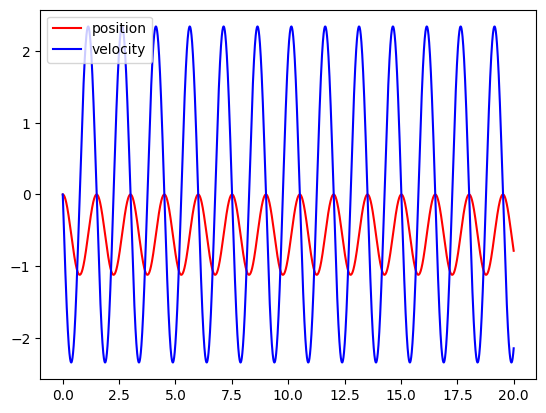

In [ ]:
#rk4

import numpy as np
import matplotlib.pyplot as plt 

def derivspring(state,time):    
    k= -3.5
    m= 0.2
    g= 9.8  
    g0 = state[1]
    g1 = k/m * state[0] - g
    g = np.array([g0,g1])      
    return g

def euler(y,t,dt,derivspring):
    y_next = y + derivspring(y,t)*dt
    return y_next 

def rk2(y,t,dt, derivs):
    k0 = dt*derivs(y,t)
    k1 = dt*derivs (y+k0,t+dt)              
    y_next = y + 0.5*(k0+k1) 
    return y_next


def rk4(y,t,dt, derivs):
    k1=dt*derivs(y,t)
    k2=dt*derivs (y+(k1/2),t+(dt/2))
    k3=dt*derivs (y+(k2/2),t+(dt/2))
    k4=dt*derivs (y+k3,t+dt)
    y_next=y + (k1+2*k2+2*k3+k4)/6 
    return y_next


N = 5000
y = np.zeros([N,2])

y[0,0] = 0  #initial position of object
y[0,1] = -0 #initial velocity of the object
tau = 20    #computation time

dt = tau/float(N-1)  #time step 
time = np.linspace(0,tau,N)

plt.figure()

for j in range(N-1):
    y[j+1, :]  = rk4(y[j,:],time[j],dt,derivspring)
    
    

xdata = [ y[j,0] for j in range(N) ] 
vdata = [ y[j,1] for j in range(N) ] 

plt.plot(time,xdata,'r')
plt.plot(time,vdata,'b')
plt.legend(['position', 'velocity'])

plt.show()



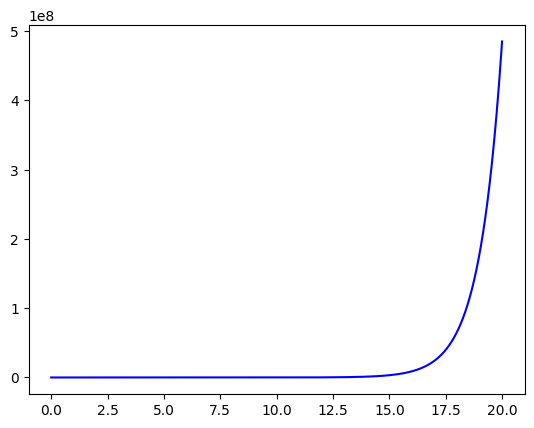

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def derive(y,t):
    f= np.exp(t)
    return f

def euler (y,t,dt,derive):
    y_next = y + dt * derive(y,t)
    return y_next 

N = 1000
y = np.zeros([N])
t = np.zeros([N])

y[0]= 1
tau = 20
t = np.linspace(0,tau,N)
dt = tau/float(N)

for j in range(N-1):
    y[j+1] = euler(y[j], t[j],dt,derive)


plt.plot(t,np.exp(t)+y[0]-1,'b')  
 



C:\Users\shiva\AppData\Local\Temp\ipykernel_20576\2525705520.py:5: RuntimeWarning: overflow encountered in scalar power
  f= t* y**2


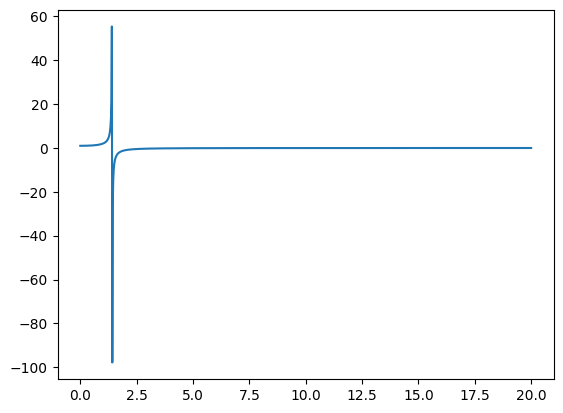

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def derive(y,t):
    f= t* y**2
    return f

def euler (y,t,dt,derive):
    y_next = y + dt * derive(y,t)
    return y_next 

N = 1000
y = np.zeros([N])
t = np.zeros([N])

y[0]= 1
tau = 20
t = np.linspace(0,tau,N)
dt = tau/float(N)

for j in range(N-1):
    y[j+1] = euler(y[j], t[j],dt,derive)

ysol = -1/((t**2)/2 - 1/ y[0])
plt.plot(t,ysol)  
 



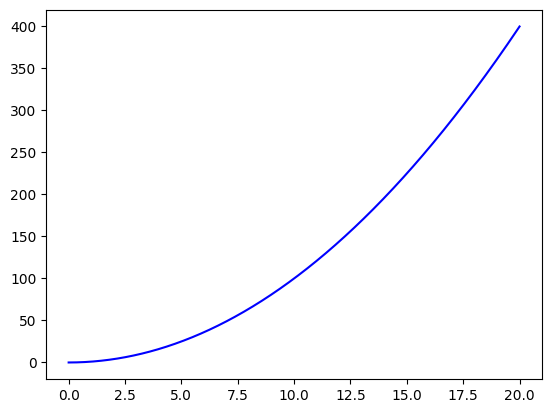

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def derive(y,t):
    f= 2*t
    return f

def euler (y,t,dt,derive):
    y_next = y + dt * derive(y,t)
    return y_next 

N = 1000
y = np.zeros([N])
t = np.zeros([N])

tau = 20
t = np.linspace(0,tau,N)
dt = tau/float(N)

y[0]= 0

for j in range(N-1):
    y[j+1] = euler(y[j], t[j],dt,derive)

ysol = t**2
plt.plot(t,ysol,'b')  
 



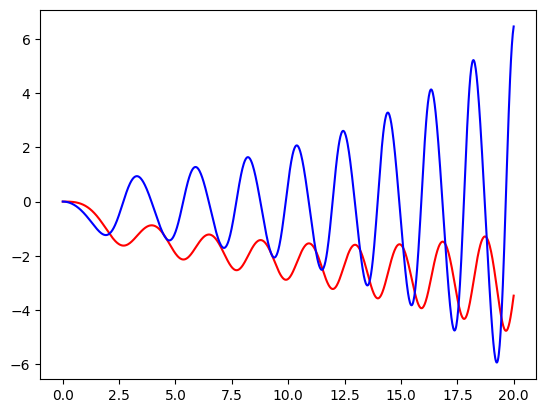

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def derive(y, t):
    y0 = y[1]
    y1 = 2 * y[0]**2 - t
    dydt = np.array([y0, y1])
    return dydt

def euler(y, t, dt, derive):
    y_next = y + dt * derive(y, t)
    return y_next 

N = 1000
y = np.zeros([N, 2])
t = np.zeros([N])

tau = 20
t = np.linspace(0, tau, N)
dt = tau / float(N)

y[0, 0] = 0
y[0, 1] = 0

for j in range(N - 1):
    y[j + 1, :] = euler(y[j, :], t[j], dt, derive)

time = np.linspace(0, tau, N) # Added this line to define time
xdata = [y[j, 0] for j in range(N)] 
vdata = [y[j, 1] for j in range(N)] 

plt.plot(time, xdata, 'r')
plt.plot(time, vdata, 'b')
plt.show()


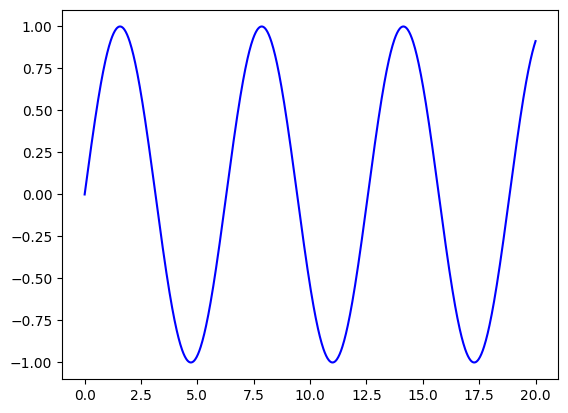

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def derive(y,t):
    f= np.cos(t)
    return f

def euler (y,t,dt,derive):
    y_next = y + dt * derive(y,t)
    return y_next 

y = np.zeros([N])

N = 1000
tau = 20
t = np.linspace(0,tau,N)
dt = tau/float(N)

y[0]= 0

for j in range(N-1):
    y[j+1] = euler(y[j], t[j],dt,derive)

ysol = np.sin(t)
plt.plot(t,ysol,'b')  
 



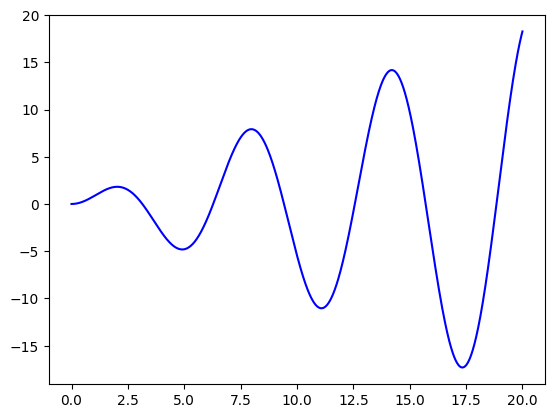

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def derive(y,t):
    f= np.sin(t) + t*np.cos(t) 
    return f

def euler (y,t,dt,derive):
    y_next = y + dt * derive(y,t)
    return y_next 

y = np.zeros([N])

N = 1000
tau = 20
t = np.linspace(0,tau,N)
dt = tau/float(N)

y[0]= 0

for j in range(N-1):
    y[j+1] = euler(y[j], t[j],dt,derive)

ysol = t* np.sin(t)
plt.plot(t,ysol,'b')  
 



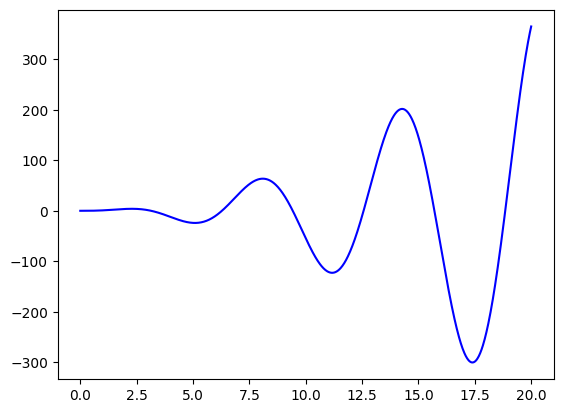

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def derive(y,t):
    f= 2*t* np.sin(t) + t**2 *np.cos(t) 
    return f

def euler (y,t,dt,derive):
    y_next = y + dt * derive(y,t)
    return y_next 

y = np.zeros([N])

N = 1000
tau = 20
t = np.linspace(0,tau,N)
dt = tau/float(N)

y[0]= 0

for j in range(N-1):
    y[j+1] = euler(y[j], t[j],dt,derive)

ysol = t**2 * np.sin(t)
plt.plot(t,ysol,'b')  
 



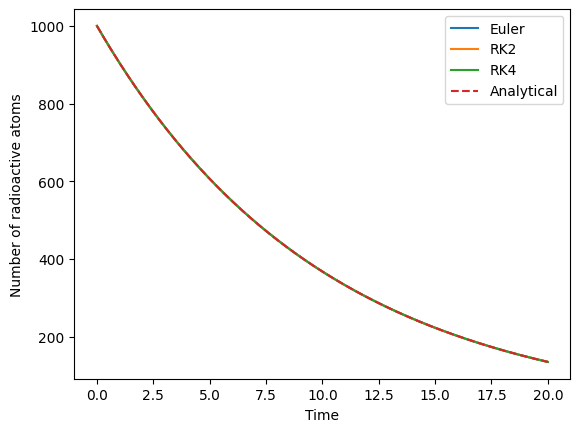

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

# Function for radioactive decay
def decay(N, t):
    decay_constant = 0.1  # Example decay constant
    return -decay_constant * N

# Euler method for numerical integration
def euler(N, t, dt):
    N_next = N + decay(N, t) * dt
    return N_next

# RK2 method for numerical integration
def rk2(N, t, dt):
    k1 = dt * decay(N, t)
    k2 = dt * decay(N + 0.5 * k1, t + 0.5 * dt)
    N_next = N + k2
    return N_next

# RK4 method for numerical integration
def rk4(N, t, dt):
    k1 = dt * decay(N, t)
    k2 = dt * decay(N + 0.5 * k1, t + 0.5 * dt)
    k3 = dt * decay(N + 0.5 * k2, t + 0.5 * dt)
    k4 = dt * decay(N + k3, t + dt)
    N_next = N + (k1 + 2*k2 + 2*k3 + k4) / 6
    return N_next

# Initial conditions
N0 = 1000  # Initial number of radioactive atoms
tau = 20   # Computation time
N_steps = 5000
dt = tau / N_steps
time = np.linspace(0, tau, N_steps)

# Arrays to store results
N_euler = np.zeros(N_steps)
N_rk2 = np.zeros(N_steps)
N_rk4 = np.zeros(N_steps)

# Initial values
N_euler[0] = N0
N_rk2[0] = N0
N_rk4[0] = N0

# Numerical integration using different methods
for i in range(1, N_steps):
    N_euler[i] = euler(N_euler[i-1], time[i-1], dt)
    N_rk2[i] = rk2(N_rk2[i-1], time[i-1], dt)
    N_rk4[i] = rk4(N_rk4[i-1], time[i-1], dt)

# Analytical solution
N_analytical = N0 * np.exp(-0.1 * time)

# Plotting results
plt.plot(time, N_euler, label='Euler')
plt.plot(time, N_rk2, label='RK2')
plt.plot(time, N_rk4, label='RK4')
plt.plot(time, N_analytical, label='Analytical', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Number of radioactive atoms')
plt.legend()
plt.show()


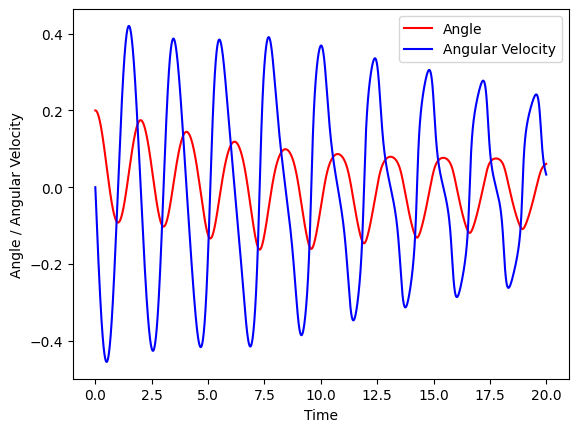

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def deriv_pend(y, t, g, l, b, beta):
    y0 = y[1]
    y1 = -(g / l) * np.sin(y[0]) - b * y[1] + beta * np.cos(y[1] * t)
    dydt = np.array([y0, y1])
    return dydt

def rk4(y, t, dt, g, l, b, beta):
    k1 = dt * deriv_pend(y, t, g, l, b, beta)
    k2 = dt * deriv_pend(y + 0.5 * k1, t + 0.5 * dt, g, l, b, beta)
    k3 = dt * deriv_pend(y + 0.5 * k2, t + 0.5 * dt, g, l, b, beta)
    k4 = dt * deriv_pend(y + k3, t + dt, g, l, b, beta)
    y_next = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return y_next

N = 5000
y = np.zeros([N, 2])

# Initial conditions
y[0, 0] = 0.2  # Initial angle
y[0, 1] = 0.0  # Initial angular velocity

# Parameters
g = 9.8       # Acceleration due to gravity
l = 1.0       # Length of pendulum
b = 0.1       # Damping coefficient
beta = 0.5    # Amplitude of driving force

tau = 20      # Computation time
dt = tau / (N - 1)  # Time step
time = np.linspace(0, tau, N)

plt.figure()

for j in range(N - 1):
    y[j + 1, :] = rk4(y[j, :], time[j], dt, g, l, b, beta)

plt.plot(time, y[:, 0], 'r', label='Angle')
plt.plot(time, y[:, 1], 'b', label='Angular Velocity')
plt.xlabel('Time')
plt.ylabel('Angle / Angular Velocity')
plt.legend()
plt.show()


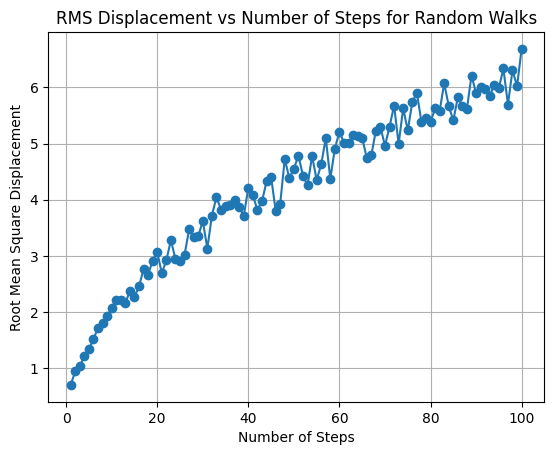

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

def random_walk(steps):
    position = 0
    positions = [position]
    for _ in range(steps):
        step = random.choice([-1, 1])
        position += step
        positions.append(position)
    return positions

def rms_displacement(walk):
    squared_displacements = [(x - walk[0])**2 for x in walk]
    return np.sqrt(np.mean(squared_displacements))

num_walks = 100
max_steps = 100
rms_values = []

for steps in range(1, max_steps + 1):
    rms_sum = 0
    for _ in range(num_walks):
        walk = random_walk(steps)
        rms_sum += rms_displacement(walk)
    rms_avg = rms_sum / num_walks
    rms_values.append(rms_avg)

plt.plot(range(1, max_steps + 1), rms_values, marker='o', linestyle='-')
plt.xlabel('Number of Steps')
plt.ylabel('Root Mean Square Displacement')
plt.title('RMS Displacement vs Number of Steps for Random Walks')
plt.grid(True)
plt.show()


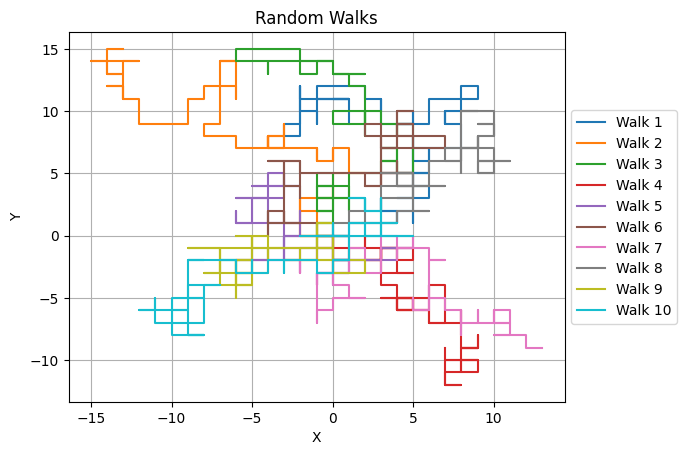

In [ ]:
import random
import matplotlib.pyplot as plt

def random_walk(steps):
    position = [0, 0]
    positions = [position.copy()]
    for _ in range(steps):
        step = random.choice([(1, 0), (-1, 0), (0, 1), (0, -1)])  # Random step in all four directions
        position[0] += step[0]
        position[1] += step[1]
        positions.append(position.copy())
    return positions

def generate_random_walks(num_walks, num_steps):
    walks = []
    for _ in range(num_walks):
        walk = random_walk(num_steps)
        walks.append(walk)
    return walks

def plot_random_walks(walks):
    for i, walk in enumerate(walks):
        plt.plot([pos[0] for pos in walk], [pos[1] for pos in walk], label=f'Walk {i+1}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Random Walks')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    plt.show()

def main():
    num_walks = int(input("Enter the number of walks: "))
    num_steps = int(input("Enter the number of steps for each walk: "))
    
    walks = generate_random_walks(num_walks, num_steps)
    plot_random_walks(walks)

if __name__ == "__main__":
    main()


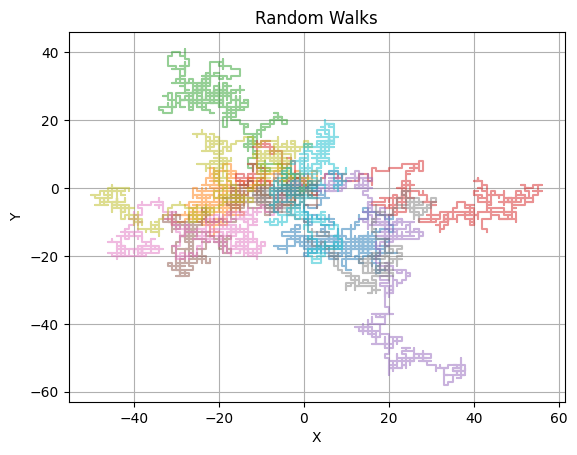

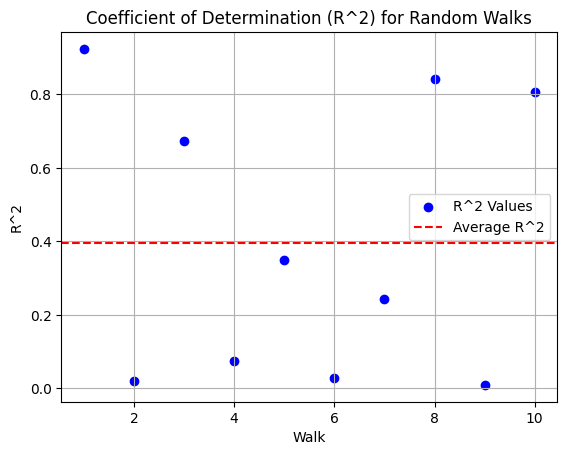

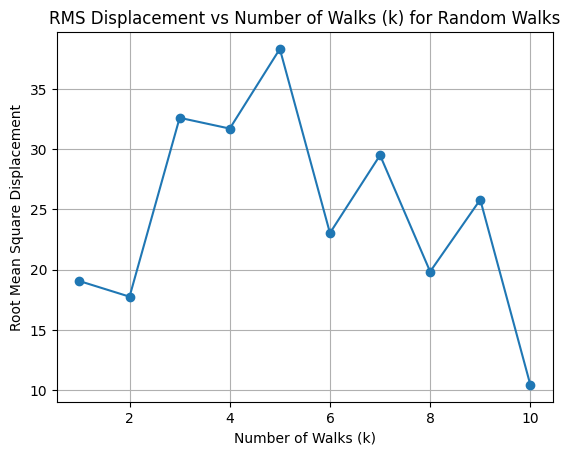

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

def random_walk(steps):
    position = [0, 0]
    positions = [position.copy()]
    radial_distances_sq = [0]
    for _ in range(steps):
        step = random.choice([(1, 0), (-1, 0), (0, 1), (0, -1)])  # Random step in all four directions
        position[0] += step[0]
        position[1] += step[1]
        positions.append(position.copy())
        radial_distances_sq.append(position[0]**2 + position[1]**2)
    x = np.array([pos[0] for pos in positions])
    r_squared_values = np.corrcoef(x, radial_distances_sq)[0, 1]**2
    return positions, r_squared_values

def rms_displacement(walk):
    squared_displacements = [(pos[0]**2 + pos[1]**2) for pos in walk]
    return np.sqrt(np.mean(squared_displacements))

def generate_random_walks(num_walks, num_steps):
    walks = []
    for _ in range(num_walks):
        walk, _ = random_walk(num_steps)
        walks.append(walk)
    return walks

def plot_random_walks(walks):
    for walk in walks:
        x = [pos[0] for pos in walk]
        y = [pos[1] for pos in walk]
        plt.plot(x, y, alpha=0.5)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Random Walks')
    plt.grid(True)
    plt.show()

def plot_r_squared_values(r_squared_values):
    plt.scatter(range(1, len(r_squared_values) + 1), r_squared_values, color='blue', label='R^2 Values')
    avg_r_squared = np.mean(r_squared_values)
    plt.axhline(y=avg_r_squared, color='red', linestyle='--', label='Average R^2')
    plt.xlabel('Walk')
    plt.ylabel('R^2')
    plt.title('Coefficient of Determination (R^2) for Random Walks')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_rms_vs_k(rms_values):
    plt.plot(range(1, len(rms_values) + 1), rms_values, marker='o', linestyle='-')
    plt.xlabel('Number of Walks (k)')
    plt.ylabel('Root Mean Square Displacement')
    plt.title('RMS Displacement vs Number of Walks (k) for Random Walks')
    plt.grid(True)
    plt.show()

def main():
    num_walks = int(input("Enter the number of walks: "))
    num_steps = int(input("Enter the number of steps for each walk: "))
    
    walks = generate_random_walks(num_walks, num_steps)
    plot_random_walks(walks)
    
    r_squared_values = []
    rms_values = []
    for walk in walks:
        _, r_squared = random_walk(num_steps)
        r_squared_values.append(r_squared)
        rms_values.append(rms_displacement(walk))
    
    plot_r_squared_values(r_squared_values)
    plot_rms_vs_k(rms_values)

if __name__ == "__main__":
    main()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_decay(num_atoms, decay_prob, num_steps):
    remaining_atoms = np.ones(num_atoms, dtype=int)
    decayed_counts = []

    for _ in range(num_steps):
        decayed = np.random.rand(num_atoms) < decay_prob
        remaining_atoms -= decayed
        decayed_counts.append(num_atoms - np.sum(remaining_atoms))

    return decayed_counts

def plot_decay(decayed_counts):
    plt.plot(range(len(decayed_counts)), decayed_counts)
    plt.xlabel('Time Step')
    plt.ylabel('Decayed Atoms')
    plt.title('Radioactive Decay Simulation')
    plt.grid(True)
    plt.show()

def main():
    num_atoms = int(input("Enter the number of radioactive atoms: "))
    decay_prob = float(input("Enter the decay probability per time step (between 0 and 1): "))
    num_steps = int(input("Enter the number of time steps: "))

    decayed_counts = simulate_decay(num_atoms, decay_prob, num_steps)
    plot_decay(decayed_counts)

if __name__ == "__main__":
    main()



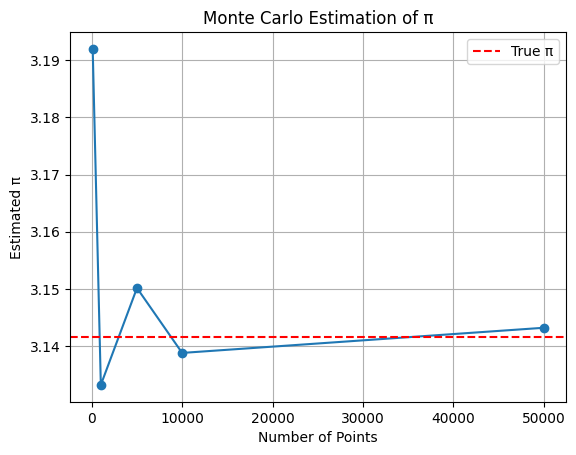

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_pi(num_points):
    points = np.random.rand(num_points, 2)  # Generate random points in the unit square
    inside_circle = points[:, 0]**2 + points[:, 1]**2 <= 1  # Check if points are inside the unit circle
    inside_circle_count = np.sum(inside_circle)
    estimated_pi = 4 * inside_circle_count / num_points
    return estimated_pi

def plot_estimate_vs_points(num_points_range, num_simulations):
    estimates = []
    for num_points in num_points_range:
        pi_estimate = np.mean([monte_carlo_pi(num_points) for _ in range(num_simulations)])
        estimates.append(pi_estimate)
    
    plt.plot(num_points_range, estimates, marker='o')
    plt.axhline(y=np.pi, color='red', linestyle='--', label='True π')
    plt.xlabel('Number of Points')
    plt.ylabel('Estimated π')
    plt.title('Monte Carlo Estimation of π')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    num_points_range = [100, 1000, 5000, 10000, 50000]
    num_simulations = 10

    plot_estimate_vs_points(num_points_range, num_simulations)

if __name__ == "__main__":
    main()


In [ ]:
def lcg(seed, a, c, m):
    random_values = []
    x = seed
    

    for _ in range(random.randrange(0,100)):
        x = (a * x + c) % m
        if(random_values.count(x)== 0 ):
            random_values.append(x)
        else:
            break
    return random_values

def main():
    
    a = 6
    c = 2
    m = 11
    
    for _ in range(random.randrange(0,100)):
        seed = random.randrange(0,100)
        random_sequence = lcg(seed, a, c, m )
        print("Random sequence:", random_sequence)
        print("Length of sequence:", len(random_sequence))

if __name__ == "__main__":
    main()


Random sequence: [0, 2, 3, 9, 1, 8, 6, 5, 10, 7]
Length of sequence: 10
Random sequence: [3, 9, 1, 8, 6, 5, 10, 7, 0, 2]
Length of sequence: 10
Random sequence: [3, 9, 1, 8, 6, 5, 10, 7, 0, 2]
Length of sequence: 10
Random sequence: [0, 2, 3, 9, 1, 8, 6, 5, 10, 7]
Length of sequence: 10
Random sequence: [2, 3, 9, 1, 8, 6, 5, 10, 7, 0]
Length of sequence: 10
Random sequence: [10, 7, 0, 2, 3, 9, 1, 8, 6, 5]
Length of sequence: 10
Random sequence: [4]
Length of sequence: 1
Random sequence: [4]
Length of sequence: 1
Random sequence: [2, 3, 9, 1, 8, 6, 5, 10, 7, 0]
Length of sequence: 10
Random sequence: [8, 6, 5, 10, 7, 0, 2, 3, 9, 1]
Length of sequence: 10
Random sequence: [8, 6, 5, 10, 7, 0, 2, 3, 9, 1]
Length of sequence: 10
Random sequence: [8, 6, 5, 10, 7, 0, 2, 3, 9, 1]
Length of sequence: 10
Random sequence: [1, 8, 6, 5, 10, 7, 0, 2, 3, 9]
Length of sequence: 10
Random sequence: [2, 3, 9, 1, 8, 6, 5, 10, 7, 0]
Length of sequence: 10
Random sequence: [5, 10, 7, 0, 2, 3, 9, 1, 8, 6]
L

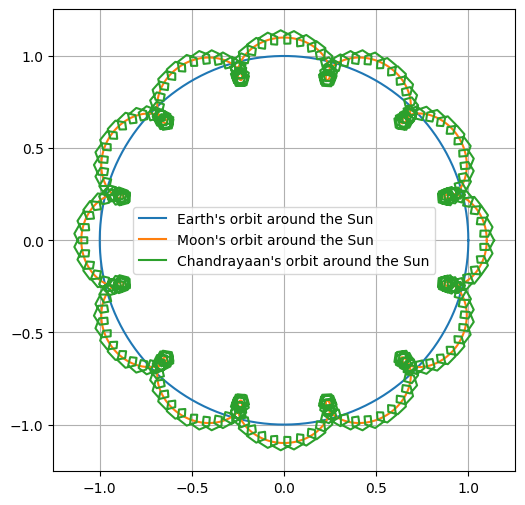

In [140]:

import matplotlib.pyplot as plt
import numpy as np

class Earth:
    def __init__(self, Re, Oe):            
        self.RadE = Re                                 
        self.wplanet = Oe                     
        self.color = 'r'
        self.dt = 0.04
        
    def getXp(self, time):
        return self.RadE * np.cos(self.wplanet * time)
    
    def getYp(self, time):
        return self.RadE * np.sin(self.wplanet * time)
    
    def position(self, t):                                 
        x = self.getXp(t)
        y = self.getYp(t)
        return x, y

class Moon(Earth):            
    
    def __init__(self, Re, Oe, Rm, Om):   
        Earth.__init__(self, Re, Oe)
        self.radM = Rm                                  
        self.wmoon = Om                         
        self.color = 'b'
        self.dt = 0.02
        
    def getXm(self, time):
        xp = self.getXp(time)
        return xp + self.radM * np.cos(self.wmoon * time)

    def getYm(self, time):
        yp = self.getYp(time)
        return yp + self.radM * np.sin(self.wmoon * time)

    def position(self, t):
        x = self.getXm(t)
        y = self.getYm(t)
        return x, y

class Chandrayaan(Moon):             
    
    def __init__(self,Re, Oe, Rm, Om, Rc, Oc):   
        Moon.__init__(self, Re, Oe, Rm, Om)  
        self.radC = Rc                                  
        self.Wc = Oc                         
        self.color = 'g'
        self.dt = 0.01
        
    def getXc(self, time):
        xm = self.getXm(time) 
        return xm + self.radC * np.cos(self.Wc * time)

    def getYc(self, time):
        ym = self.getYm(time) 
        return ym + self.radC * np.sin(self.Wc * time)
    
    def position(self, t):
        x = self.getXc(t)
        y = self.getYc(t)
        return x, y


planet = Earth(1.0, 1.0)  
moon = Moon(1, 1, 0.1, 13.0)
chandrayaan = Chandrayaan(1, 1 , 0.1, 13.0, 0.04, 200.0)

t = np.linspace(0, 2*np.pi, 1000)
xe, ye = planet.position(t)
xm, ym = moon.position(t)
xc, yc = chandrayaan.position(t)

plt.figure(figsize=(6, 6))
plt.plot(xe, ye, label="Earth's orbit around the Sun")
plt.plot(xm, ym, label="Moon's orbit around the Sun")
plt.plot(xc, yc, label="Chandrayaan's orbit around the Sun")
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def derive(N,L,t):
    f= np.exp(-L*t) 
    return f

def euler (N,L,t,dt):
    N_next = N + dt * derive(N,L,t)
    return N_next 


M = 1000
tau = 20
t = np.linspace(0,tau,M)
dt = tau/float(M)

N = np.zeros([M])
L= 0.7


N[0]= 10000

for j in range(M-1):
    N[j+1] = euler(N[j], t[j],dt,derive)

plt.plot(t,N,'r',label="Iterative")

Nsol = -np.exp(-L*t)+N[0]+1
plt.plot(t,Nsol,'b',label="Analytical")  
 
plt.legend()


TypeError: unsupported operand type(s) for *: 'function' and 'float'

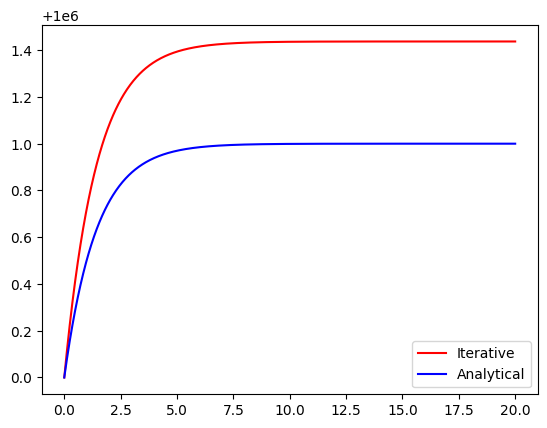

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def derive(N, L, t):
    f = np.exp(-L*t)
    return f

def euler(N, L, t, dt):
    N_next = N + dt * derive(N, L, t)
    return N_next 

M = 1000
tau = 20
t = np.linspace(0, tau, M)
dt = tau / float(M)

N = np.zeros([M])
L = 0.7

N[0] = 1000000

for j in range(M - 1):
    N[j + 1] = euler(N[j], L, t[j], dt)

plt.plot(t, N, 'r', label="Iterative")

Nsol = - np.exp(-L * t) + N[0] + 1
plt.plot(t, Nsol, 'b', label="Analytical")  
 
plt.legend()
plt.show()


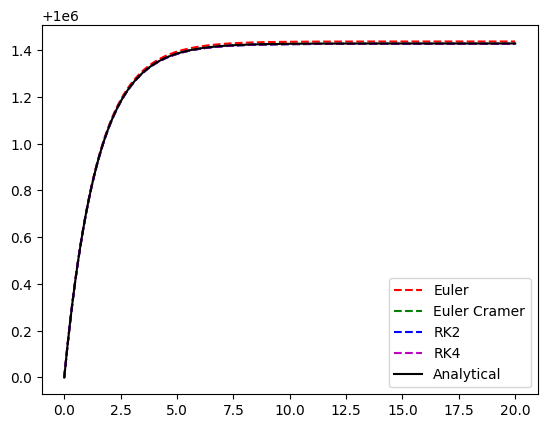

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def derive(N, L, t):
    f = np.exp(-L*t)
    return f

def euler(N, L, t, dt):
    N_next = N + dt * derive(N, L, t)
    return N_next 

def euler_cramer(N, L, t, dt):
    N_next = N + dt * derive(N + dt / 2 * derive(N, L, t), L, t + dt / 2)
    return N_next 

def rk2(N, L, t, dt):
    k1 = dt * derive(N, L, t)
    k2 = dt * derive(N + k1, L, t +  dt)
    N_next = N + 0.5*(k1+k2)
    return N_next 

def rk4(N, L, t, dt):
    k1 = dt * derive(N, L, t)
    k2 = dt * derive(N + 0.5 * k1, L, t + 0.5 * dt)
    k3 = dt * derive(N + 0.5 * k2, L, t + 0.5 * dt)
    k4 = dt * derive(N + k3, L, t + dt)
    N_next = N + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return N_next 

M = 1000

tau = 20
t = np.linspace(0, tau, M)
dt = tau / float(M)

N = np.zeros([M])
L = 0.7

N[0] = 1000000

# Euler
for j in range(M - 1):
    N[j + 1] = euler(N[j], L, t[j], dt)
plt.plot(t, N, 'r--', label="Euler")

# Cramer's correction
N = np.zeros([M])
N[0] = 1000000
for j in range(M - 1):
    N[j + 1] = euler_cramer(N[j], L, t[j], dt)
plt.plot(t, N, 'g--', label="Euler Cramer")

# RK2
N = np.zeros([M])
N[0] = 1000000
for j in range(M - 1):
    N[j + 1] = rk2(N[j], L, t[j], dt)
plt.plot(t, N, 'b--', label="RK2")

# RK4
N = np.zeros([M])
N[0] = 1000000
for j in range(M - 1):
    N[j + 1] = rk4(N[j], L, t[j], dt)
plt.plot(t, N, 'm--', label="RK4")

Nsol = - np.exp(-L * t)/float(L) + N[0] + 1/float(L)
plt.plot(t, Nsol, 'k', label="Analytical")  

plt.legend()
plt.show()


In [1]:
import sympy as sp

# Define symbols for time, angles, and their derivatives
t = sp.symbols('t')
theta1 = sp.Function('theta1')(t)
theta2 = sp.Function('theta2')(t)
theta3 = sp.Function('theta3')(t)

# Lengths and masses
l1, l2, l3 = sp.symbols('l1 l2 l3')
m1, m2, m3 = sp.symbols('m1 m2 m3')
g = sp.symbols('g')

# First derivatives of angles (angular velocities)
theta1_dot = theta1.diff(t)
theta2_dot = theta2.diff(t)
theta3_dot = theta3.diff(t)

# Positions of masses in Cartesian coordinates
x1 = l1 * sp.sin(theta1)
y1 = -l1 * sp.cos(theta1)

x2 = x1 + l2 * sp.sin(theta2)
y2 = y1 - l2 * sp.cos(theta2)

x3 = x2 + l3 * sp.sin(theta3)
y3 = y2 - l3 * sp.cos(theta3)

# Velocities of masses (kinetic energy)
v1_sq = x1.diff(t)**2 + y1.diff(t)**2
v2_sq = x2.diff(t)**2 + y2.diff(t)**2
v3_sq = x3.diff(t)**2 + y3.diff(t)**2

T = sp.Rational(1, 2) * m1 * v1_sq + sp.Rational(1, 2) * m2 * v2_sq + sp.Rational(1, 2) * m3 * v3_sq

# Potential energy
V = m1 * g * y1 + m2 * g * y2 + m3 * g * y3

# Lagrangian
L = T - V

# Euler-Lagrange equations
EL1 = sp.diff(sp.diff(L, theta1_dot), t) - sp.diff(L, theta1)
EL2 = sp.diff(sp.diff(L, theta2_dot), t) - sp.diff(L, theta2)
EL3 = sp.diff(sp.diff(L, theta3_dot), t) - sp.diff(L, theta3)

# Simplify equations
EL1 = sp.simplify(EL1)
EL2 = sp.simplify(EL2)
EL3 = sp.simplify(EL3)

# Display the equations
sp.pprint(EL1)
sp.pprint(EL2)
sp.pprint(EL3)


   ⎛                                                              2           
   ⎜                                                             d            
l₁⋅⎜g⋅m₁⋅sin(θ₁(t)) + g⋅m₂⋅sin(θ₁(t)) + g⋅m₃⋅sin(θ₁(t)) + l₁⋅m₁⋅───(θ₁(t)) + l
   ⎜                                                              2           
   ⎝                                                            dt            

       2                  2                                              2    
      d                  d                                    ⎛d        ⎞     
₁⋅m₂⋅───(θ₁(t)) + l₁⋅m₃⋅───(θ₁(t)) + l₂⋅m₂⋅sin(θ₁(t) - θ₂(t))⋅⎜──(θ₂(t))⎟  + l
       2                  2                                   ⎝dt       ⎠     
     dt                 dt                                                    

                          2                                              2    
                         d                                    ⎛d        ⎞     
₂⋅m₂⋅cos(θ₁(t) - θ₂(t))⋅───(θ₂(t)) + l₂⋅m₃⋅sin(θ₁(

: 